In [1]:
# Sao Paulo, 03 de Novembro de 2021
# Em resumo, o que importa e' a tabela patent_govintorg, que relaciona um patent_id a uma agencia governamental
# Esta implicito uma dummy (se a patente tem interesse governamental) convertendo organization_id 
# Talvez valha a pena classificar as agencias em militar/civil

# September 23rd, 2021
# Sao tres tabelas, patent_contractawardnumber, patent_govintorg e government_organization.
# De maior interesse e' o cruzamento entre as duas ultimas, para ver quais agencias contrataram quais patentes

# February 14st, 2020
# Government patents

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#numero dos contratos
#contract='data/patent_contractawardnumber.tsv.zip'
#patente-organization_id
pat_gov='data/patent_govintorg.tsv.zip'
#dados das organizacao
gov_org='data/government_organization.tsv.zip'

patent='data/cleanpatent.parquet.gz'

#df_contract=pd.read_csv(contract, compression='zip', sep='\t')
df_pat_govt=pd.read_csv(pat_gov, compression='zip',  sep='\t', index_col='patent_id')
df_gov_org=pd.read_csv(gov_org, compression='zip',  sep='\t')
df_pat = pd.read_parquet(patent)

#df_class=pd.read_csv('data/wipo.tsv.zip', compression='zip', sep='\t')

In [4]:
#df_contract.describe()

In [5]:
df_pat_govt.head()

organization_id
patent_id                 
10000026                10
10000036                35
10000377                10
10000377                47
10000384                31

In [6]:
df=df_pat_govt.merge(df_gov_org, left_on='organization_id', right_on='organization_id', how='inner')

In [7]:
df.head()

organization_id                  name             level_one level_two  \
0               10  Department of Energy  Department of Energy       NaN   
1               10  Department of Energy  Department of Energy       NaN   
2               10  Department of Energy  Department of Energy       NaN   
3               10  Department of Energy  Department of Energy       NaN   
4               10  Department of Energy  Department of Energy       NaN   

  level_three  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [9]:
dst='data/df_pat_govt.parquet.gz'
df_pat_govt = df_pat_govt.rename(columns={'organization_id': 'gov_organization_id'})
#df_pat_govt.to_parquet(dst, compression='gzip')

In [10]:
#as colunas quali perdem o sentido quando se agrupa
df = df.rename(columns={'organization_id': 'gov_organization_id'})
df.groupby('name').count().sort_values('gov_organization_id',ascending=False).head() 

gov_organization_id  level_one  level_two  \
name                                                                       
National Institutes of Health                34437      34437      34437   
United States Government                     26850      26850          0   
Department of Energy                         24960      24960          0   
National Science Foundation                  13890      13890          0   
Air Force                                     8144       8144       8144   

                               level_three  
name                                        
National Institutes of Health            0  
United States Government                 0  
Department of Energy                     0  
National Science Foundation              0  
Air Force                                0

In [17]:
# aqui associamos a patente a sua data de grant, o num de claims e o id do orgao governamental
df2=df_pat.merge(df_pat_govt, left_index=True, right_on='patent_id', how='inner')
df2.head()

date  num_claims  gov_organization_id
patent_id                                       
10000026   2018          18                   10
10000036   2018          20                   35
10000377   2018          20                   10
10000377   2018          20                   47
10000384   2018          12                   31

In [14]:
%matplotlib inline
sns.set()
%config InlineBackend.figure_format = 'retina'

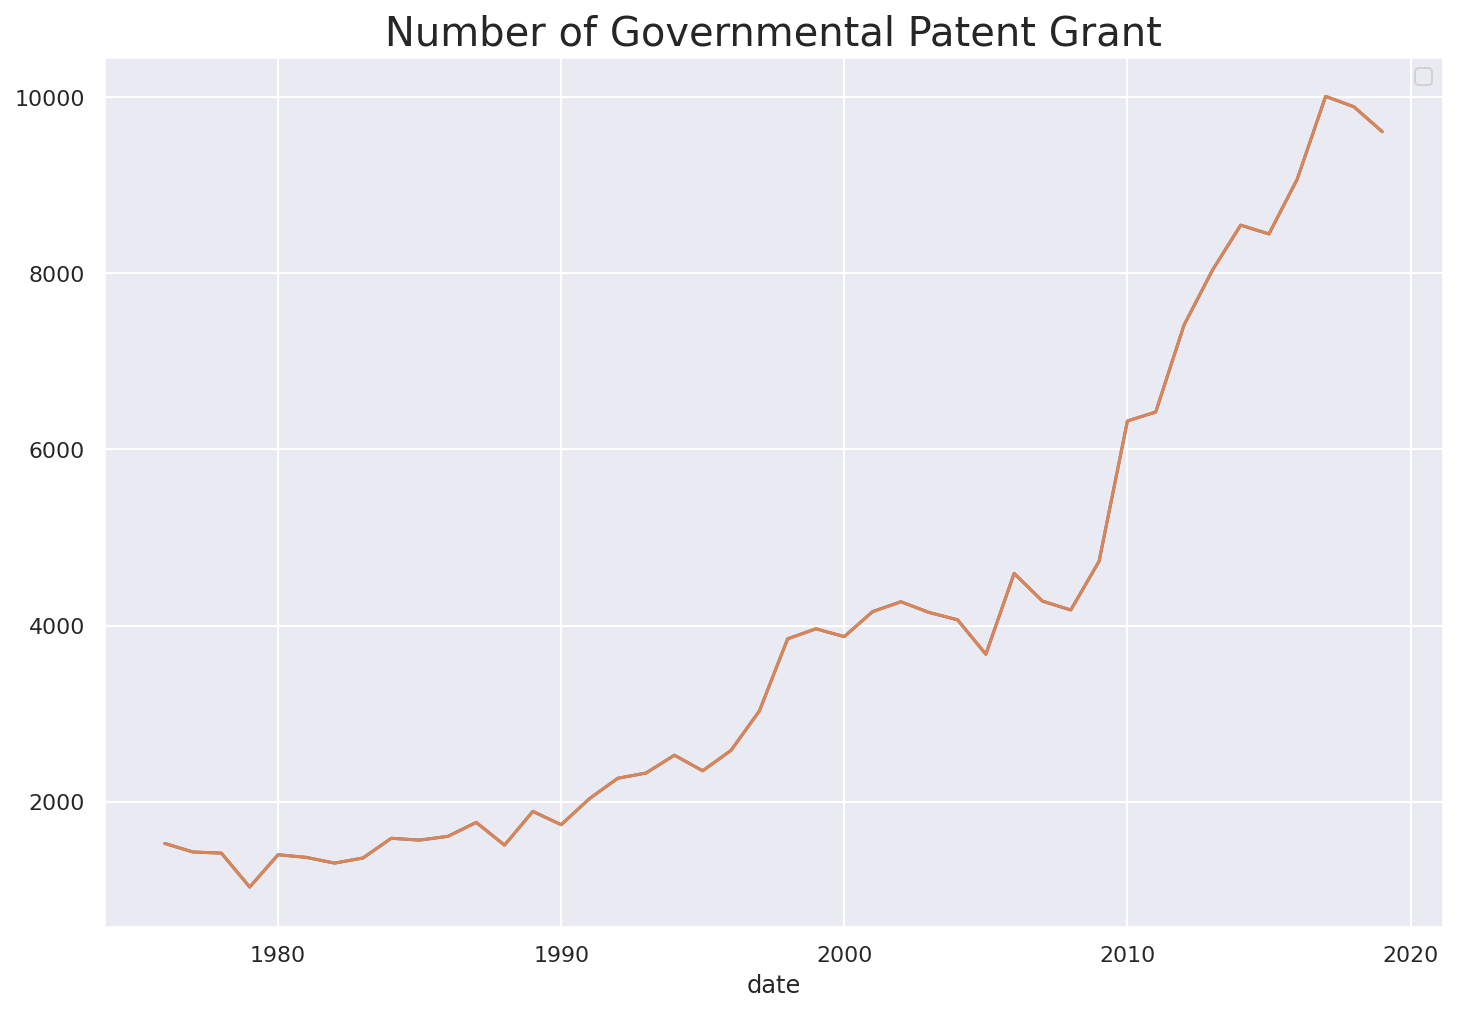

In [18]:
fig, ax=plt.subplots(figsize=(12,8))
df2.groupby('date').count().plot(ax=ax)
ax.set_title('Number of Governmental Patent Grant', fontsize=20)
plt.legend('')

In [20]:
df2['decade']=df2.date.apply(lambda s: s//10*10)
df2['decade'] =df2['decade'].apply(lambda x: int(x) if str(x) != 'nan' else np.nan)
decades=list(df2.decade.unique())
decades

[2010, 1970, 1980, 1990, 2000]

In [ ]:
#title=replace('_', ' ')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0] = df2.groupby('date').count().plot(ax=axes[0])
evl_title='Evolution of governmental patents\n'
axes[0].set_title(evl_title)
axes[0].set_ylim(bottom=0)

axes[1] = sns.boxplot(x='decade', y=df2.index, data=df2)

box_title='Dispersion of government patents \n'
axes[1].set_title(box_title)
axes[1].set_ylim(bottom=0)
axes[1].set_ylabel("")

#filename='./img/evol_dispersion_'+variable.lower()+'.png'  
#plt.savefig(filename) 
plt.show()

<AxesSubplot:xlabel='decade', ylabel='num_claims'>

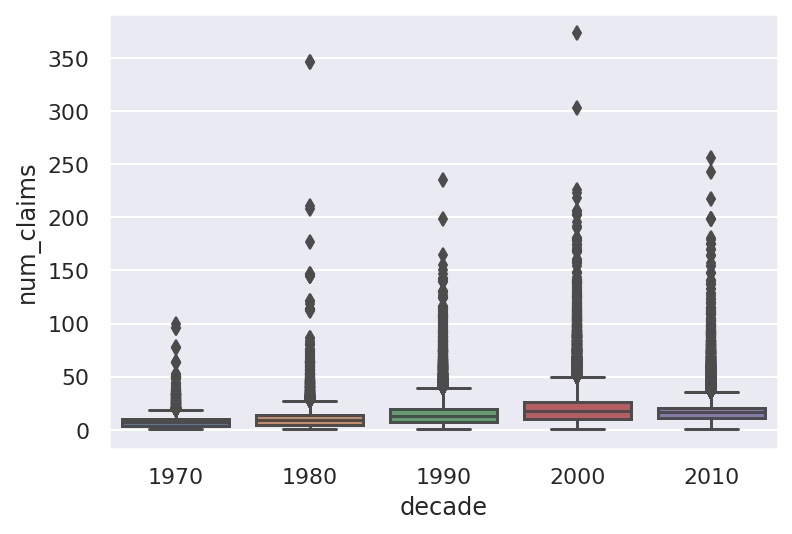

In [23]:
sns.boxplot(x='decade', y='num_claims', data=df2)

In [24]:
df_gov_org

organization_id                                               name  \
0                  1                     Department of Veterans Affairs   
1                  2                             Department of Commerce   
2                  3                                 U.S. Census Bureau   
3                  4                                  Denali Commission   
4                  5                              Department of Defense   
..               ...                                                ...   
270              288            Extended Collaborative Support Services   
271              289             Global Positioning Systems Directorate   
272              290  Isotope Development and Production for Researc...   
273              291   Tactically Exploited Reconnaissance Node program   
274              292                         Young Investigator Program   

                          level_one  \
0    Department of Veterans Affairs   
1            Department of Commerce   
2            Department of Commerce   
3                 Denali Commission   
4             Department of Defense   
..                              ...   
270     National Science Foundation   
271           Department of Defense   
272            Department of Energy   
273           Department of Defense   
274           Department of Defense   

                                             level_two  \
0                                                  NaN   
1                                                  NaN   
2                                   U.S. Census Bureau   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
270  Extreme Science and Engineering Discovery Envi...   
271                                          Air Force   
272                      Oak Ridge National Laboratory   
273          Defense Advanced Research Projects Agency   
274                                          Air Force   

                                           level_three  
0                                                  NaN  
1                                                  NaN  
2                                                  NaN  
3                                                  NaN  
4                                                  NaN  
..                                                 ...  
270            Extended Collaborative Support Services  
271             Global Positioning Systems Directorate  
272  Isotope Development and Production for Researc...  
273   Tactically Exploited Reconnaissance Node program  
274                         Young Investigator Program  

[275 rows x 5 columns]